<a href="https://colab.research.google.com/github/mfathul21/airline-customer-value/blob/main/Airline_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Customer Value Analysis

## Domain Proyek

## Business Understanding

## Data Understanding

## Data Loading

### Import Library

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

### Read Data

In [68]:
url = "https://drive.google.com/uc?id=14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U"
airline = pd.read_csv(url)

airline.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
16505,4958,12/1/2010,1/10/2011,Female,4,shanghai,shanghai,CN,32.0,3/31/2014,17,10953,12282.0,325.0,24092,5/12/2013,325,18.500000,101,0,0.609883,10953,0
14320,11118,4/11/2005,6/10/2005,Male,4,shenzhen,guangdong,CN,43.0,3/31/2014,20,13306,1896.0,12642.0,25839,3/14/2014,18,35.894737,151,2,0.640962,13306,2
47604,40489,1/20/2011,5/17/2011,Male,4,shanghai,.,CN,47.0,3/31/2014,4,2573,0.0,2348.0,4857,3/19/2014,13,114.333333,257,0,0.649905,2573,0
45788,34680,7/20/2010,7/28/2010,Male,4,jilin,jilinsheng,CN,47.0,3/31/2014,5,2782,3540.0,0.0,4179,12/26/2012,462,37.750000,114,0,0.832556,2782,0
12377,32084,3/23/2011,5/9/2011,Male,4,beijing,beijing,CN,49.0,3/31/2014,19,17858,8542.0,8976.0,20677,1/16/2014,76,35.222222,169,0,0.902124,18124,1


In [71]:
airline.shape

(62988, 23)

## Exploratory Data Analysis

### Feature Description

| Column Name       | Description                                                     |
|-------------------|-----------------------------------------------------------------|
| MEMBER_NO         | ID Member                                                       |
| FFP_DATE          | Frequent Flyer Program Join Date                                |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama                                     |
| GENDER            | Jenis Kelamin                                                   |
| FFP_TIER          | Tier dari Frequent Flyer Program                                |
| WORK_CITY         | Kota Asal                                                       |
| WORK_PROVINCE     | Provinsi Asal                                                   |
| WORK_COUNTRY      | Negara Asal                                                     |
| AGE               | Umur Customer                                                   |
| LOAD_TIME         | Tanggal data diambil                                            |
| FLIGHT_COUNT      | Jumlah penerbangan Customer                                     |
| BP_SUM            | Rencana Perjalanan                                              |
| SUM_YR_1          | Fare Revenue                                                    |
| SUM_YR_2          | Votes Prices                                                    |
| SEG_KM_SUM        | Total jarak(km) penerbangan yg sudah dilakukan                   |
| LAST_FLIGHT_DATE  | Tanggal penerbangan terakhir                                    |
| LAST_TO_END       | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL      | Rata-rata jarak waktu                                           |
| MAX_INTERVAL      | Maksimal jarak waktu                                            |
| EXCHANGE_COUNT    | Jumlah penukaran                                                |
| avg_discount      | Rata rata discount yang didapat customer                        |
| Points_Sum        | Jumlah poin yang didapat customer                               |
| Point_NotFlight   | point yang tidak digunakan oleh members                         |


In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Hasil `.info()` menunjukkan adanya indikasi data yang hilang, yaitu pada fitur GENDER, WORK_CITY, WORK_PROVINCE, dan beberapa lainnya yang akan di handling pada tahap Data Preprocessing. Sedangkan untuk tipe data sudah sesuai.

In [89]:
airline.columns = airline.columns.str.lower()

In [90]:
airline.describe()

,member_no,ffp_tier,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [72]:
airline.describe(include='O')

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


### Univariate Analysis

In [73]:
numerical_features = airline.select_dtypes(['int64', 'float64']).columns.to_list()
categorical_features = airline.select_dtypes(['object']).columns.to_list()

print(f"Jumlah Fitur Numerik: {len(numerical_features)}")
print(f"Jumlah Fitur Kategorik: {len(categorical_features)}")

Jumlah Fitur Numerik: 15
Jumlah Fitur Kategorik: 8


In [74]:
def categorical_plot(data, col):
  df = data[col].value_counts().reset_index()
  df.columns = [col, 'count']
  len_df = len(df)

  if len_df <= 10:
    sns.barplot(x=col, y='count', data=df)
    plt.title(col)
    plt.tight_layout()
    plt.show()

  else:
    top_10 = df.head(10)
    sns.barplot(x=col, y='count', data=top_10)
    plt.title(f"Top 10 of {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64


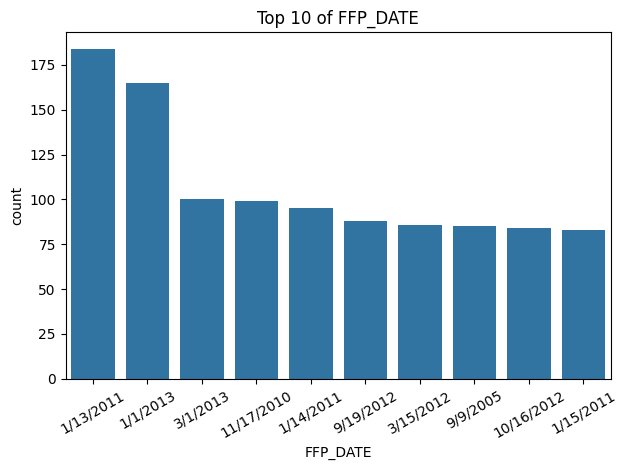

In [76]:
print(airline[categorical_features[0]].value_counts())
categorical_plot(airline, categorical_features[0])

2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64


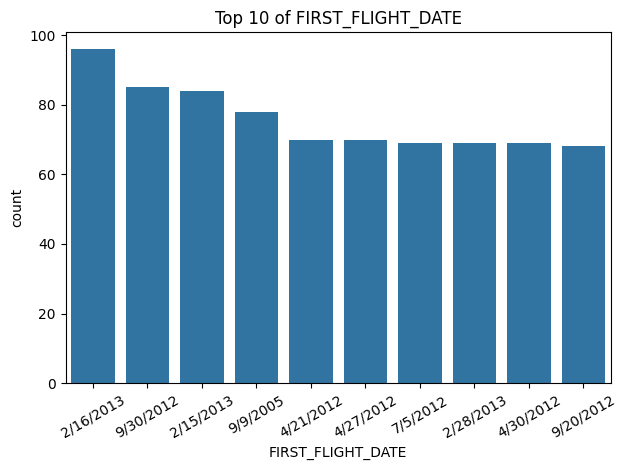

In [77]:
print(airline[categorical_features[1]].value_counts())
categorical_plot(airline, categorical_features[1])

Male      48134
Female    14851
Name: GENDER, dtype: int64


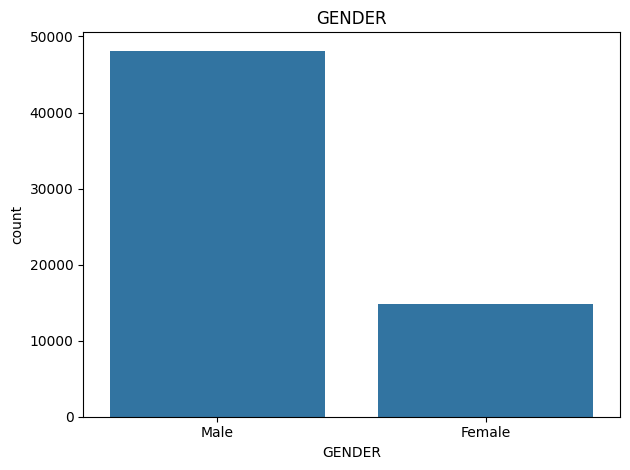

In [78]:
print(airline[categorical_features[2]].value_counts())
categorical_plot(airline, categorical_features[2])

guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64


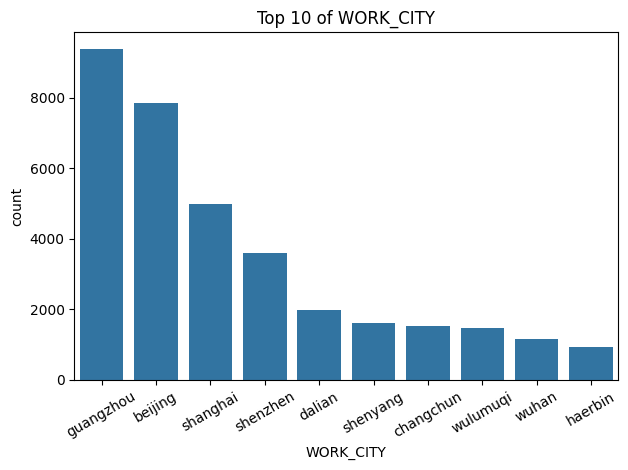

In [79]:
print(airline[categorical_features[3]].value_counts())
categorical_plot(airline, categorical_features[3])

guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64


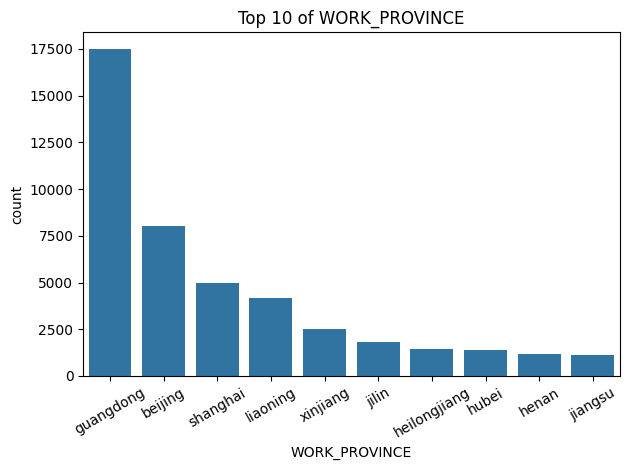

In [80]:
print(airline[categorical_features[4]].value_counts())
categorical_plot(airline, categorical_features[4])

CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64


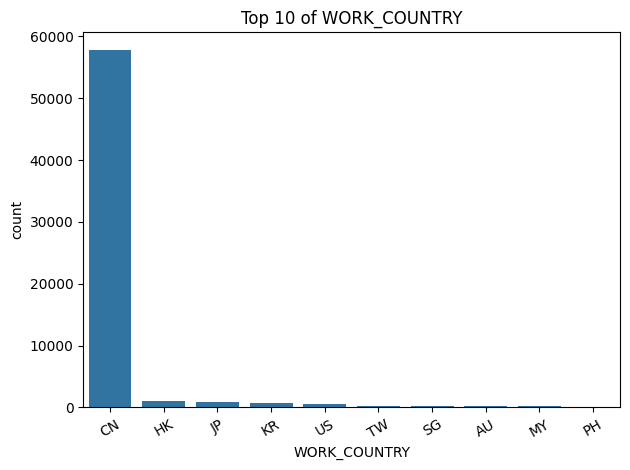

In [82]:
print(airline[categorical_features[5]].value_counts())
categorical_plot(airline, categorical_features[5])

3/31/2014    62988
Name: LOAD_TIME, dtype: int64


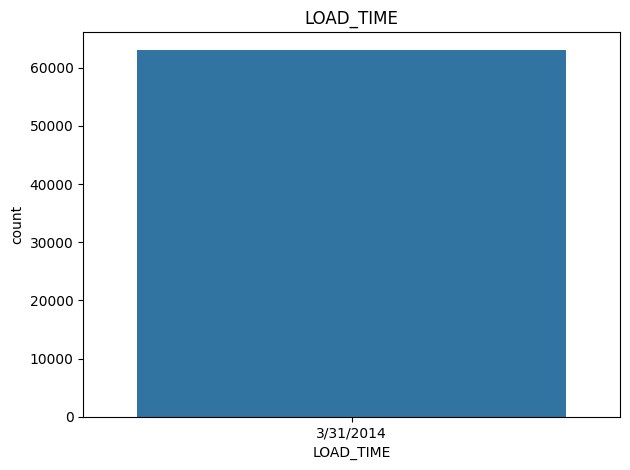

In [83]:
print(airline[categorical_features[6]].value_counts())
categorical_plot(airline, categorical_features[6])

3/31/2014    959
3/30/2014    933
3/28/2014    924
3/29/2014    779
3/27/2014    767
            ... 
4/14/2012      6
4/6/2012       3
4/2/2012       3
4/4/2012       3
4/1/2012       1
Name: LAST_FLIGHT_DATE, Length: 731, dtype: int64


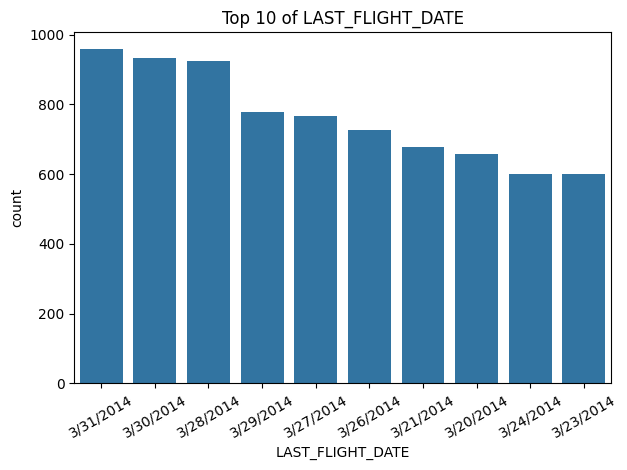

In [84]:
print(airline[categorical_features[7]].value_counts())
categorical_plot(airline, categorical_features[7])

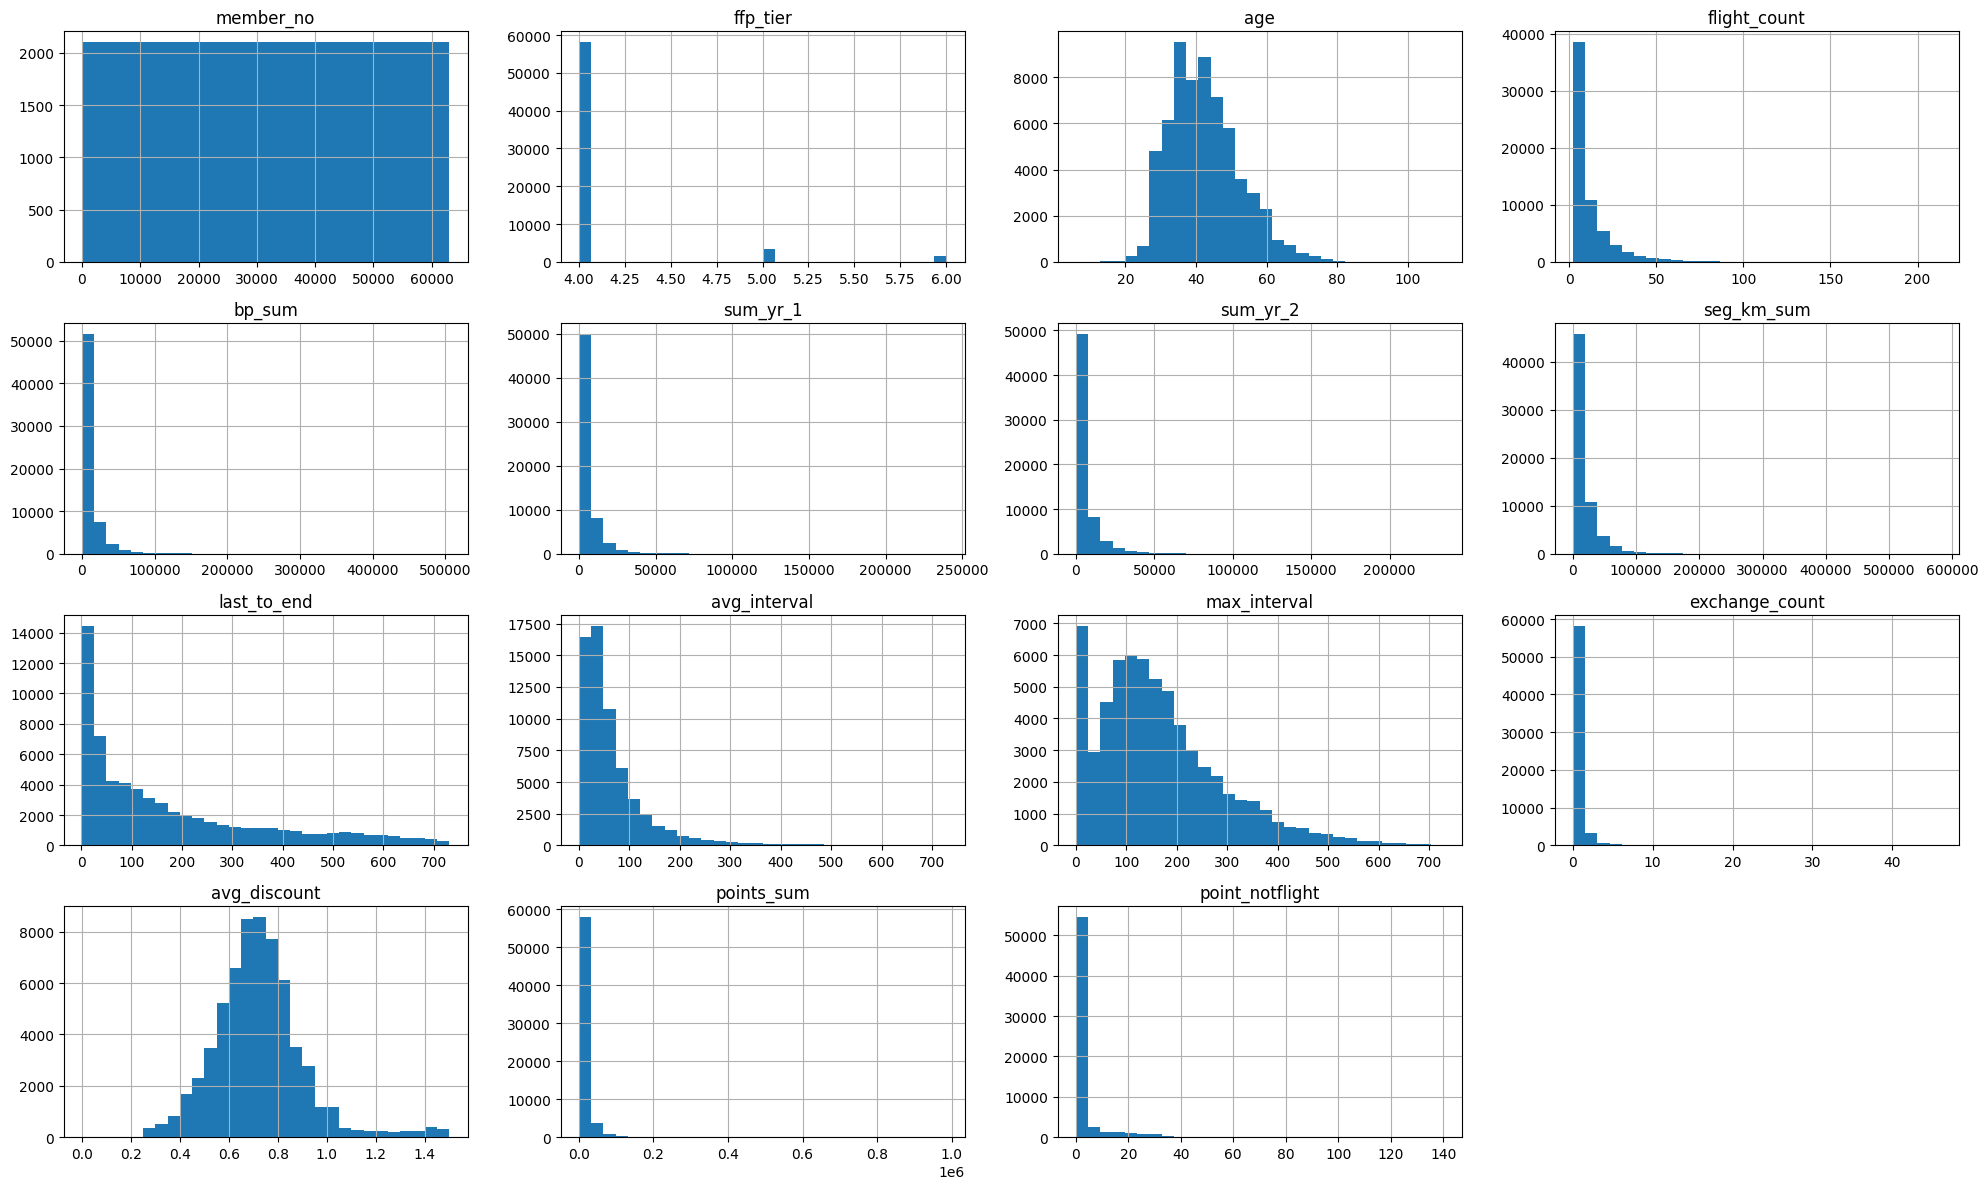

In [61]:
airline.hist(bins=30, figsize=(20,12))

plt.tight_layout()
plt.show()

### Multivariate Analysis

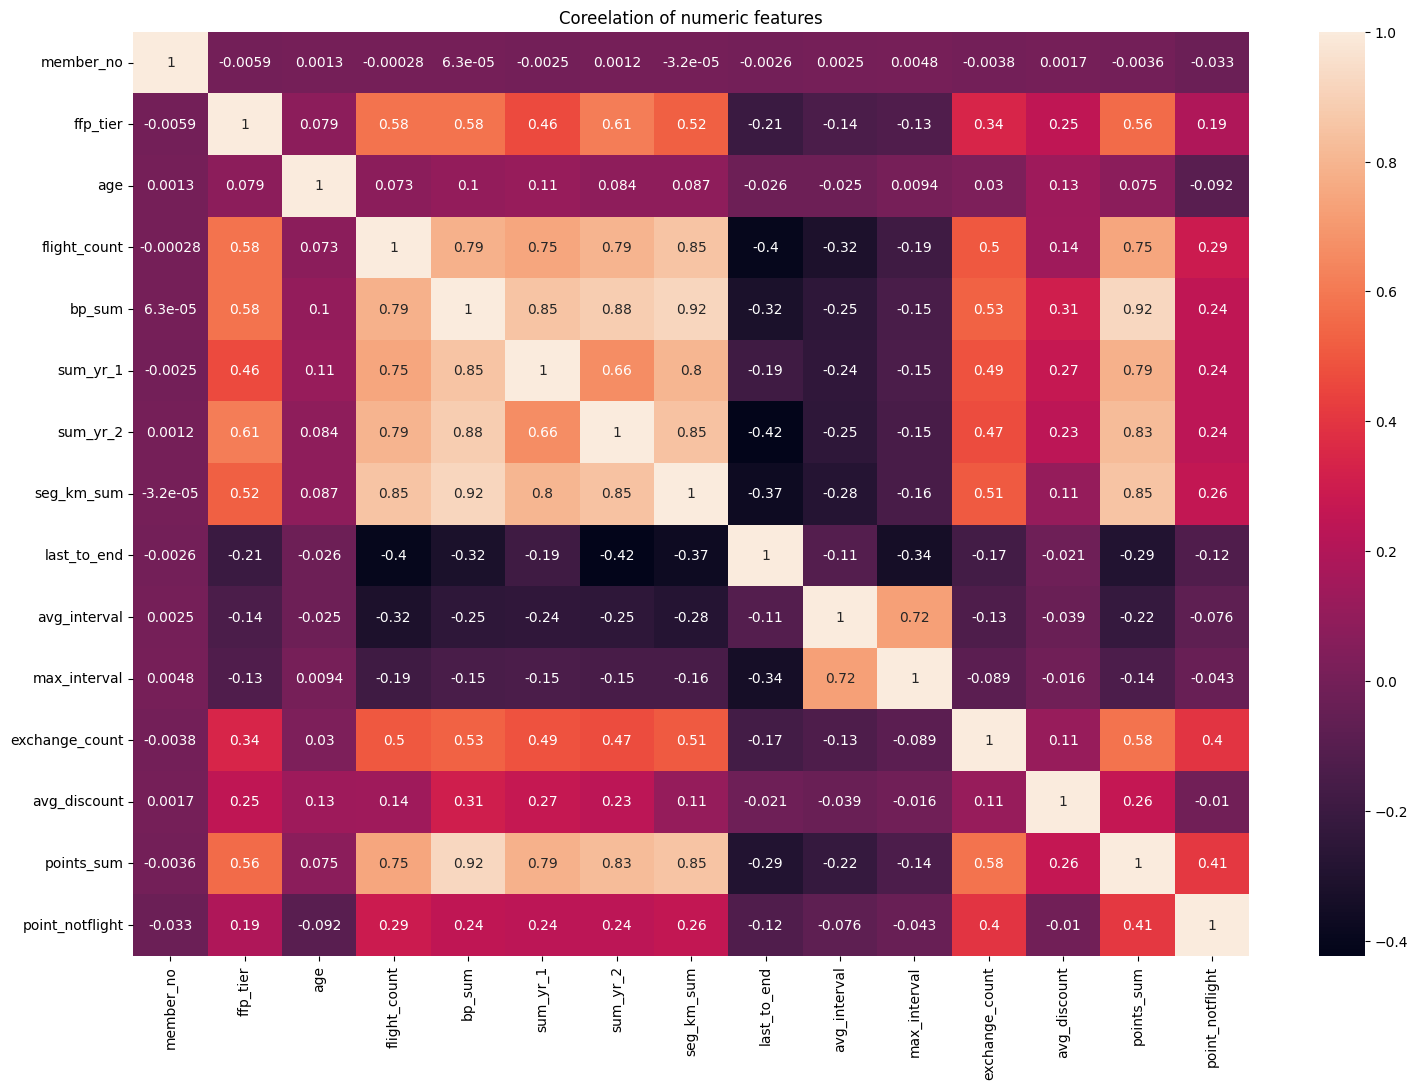

In [64]:
plt.figure(figsize=(18,12))
sns.heatmap(airline.corr(numeric_only=True), annot=True)
plt.title("Coreelation of numeric features")

plt.show()

## Data Preprocessing

**Handling Missing Values**

In [91]:
airline.isna().sum() / len(airline)

member_no            0.000000
ffp_date             0.000000
first_flight_date    0.000000
gender               0.000048
ffp_tier             0.000000
work_city            0.036023
work_province        0.051565
work_country         0.000413
age                  0.006668
load_time            0.000000
flight_count         0.000000
bp_sum               0.000000
sum_yr_1             0.008748
sum_yr_2             0.002191
seg_km_sum           0.000000
last_flight_date     0.000000
last_to_end          0.000000
avg_interval         0.000000
max_interval         0.000000
exchange_count       0.000000
avg_discount         0.000000
points_sum           0.000000
point_notflight      0.000000
dtype: float64

Dengan persentase data yang hilang (missing value) yang tergolong kecil sekitar 5% kebawah maka dipertimbangkan untuk melakukan drop pada data yang hilang. Namun, untuk fitur work_city dan work_province yang masing-masing 3% dan 5% akan tetap dipertahankan dengan mengisi nilai yang hilang pada fitur tersebut dengan mode.

In [100]:
# Drop missing value with small proportions from datasets(< 1%)
airline.dropna(subset=['gender', 'work_country', 'age', 'sum_yr_1', 'sum_yr_2'], axis=0, inplace=True)

# Fill missing value with mode
airline['work_city'].fillna(airline['work_city'].mode()[0], inplace=True)
airline['work_province'].fillna(airline['work_province'].mode()[0], inplace=True)

In [101]:
airline.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

**Handling Data Duplicates**

In [102]:
airline.duplicated().any()

False

Tidak terdapat data duplikat

### Feature Engineering

###